In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
# 读取Excel数据
file_path = '/content/drive/MyDrive/reTesla chip/total_v0708.xlsx'  # 请替换为实际路径
data = pd.read_excel(file_path)

# 打印数据的行数和列数
print(f"Number of rows: {data.shape[0]}")
print(f"Number of columns: {data.shape[1]}")

# 显示数据的头三行
print("First three rows of data:")
print(data.head(3))

Number of rows: 9551
Number of columns: 10
First three rows of data:
   Cycle  Theta   R1   L1   LL1    P1    H1  Mixing Efficiency  \
0      1     20  0.1  0.7  0.05  0.15  0.05          29.586598   
1      1     20  0.1  0.7  0.05  0.15  0.10          51.676430   
2      1     20  0.1  0.7  0.05  0.15  0.15          52.700583   

                                            filename Unnamed: 9  
0  F:/comsol_0522_ncheng/image/u1_v/u1_angle20_40...        NaN  
1  F:/comsol_0522_ncheng/image/u1_v/u1_angle20_40...        NaN  
2  F:/comsol_0522_ncheng/image/u1_v/u1_angle20_40...        NaN  


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# 决策树最基础也是最准得了 后面的多少都有点错误，
# 加载数据
df = pd.read_excel('/content/drive/MyDrive/reTesla chip/total_v0708.xlsx')

# 数据清洗和处理
df.dropna(inplace=True)  # 去除缺失值
df = df[(df['Cycle'] > 0) & (df['Theta'] > 0)]  # 示例：处理异常值

# 特征选择和转换
X = df[['Cycle', 'Theta', 'R1', 'L1', 'LL1', 'P1', 'H1']]
y = df['Mixing Efficiency']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_scaled)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# 建立模型并训练
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 预测和评估
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 10.35459727801219
R-squared: 0.801777076656516


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import os
import datetime

Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best parameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2}
MAE: 6.326812800028485
R-squared: 0.7908791036246278
RMSE: 13.02122177341912


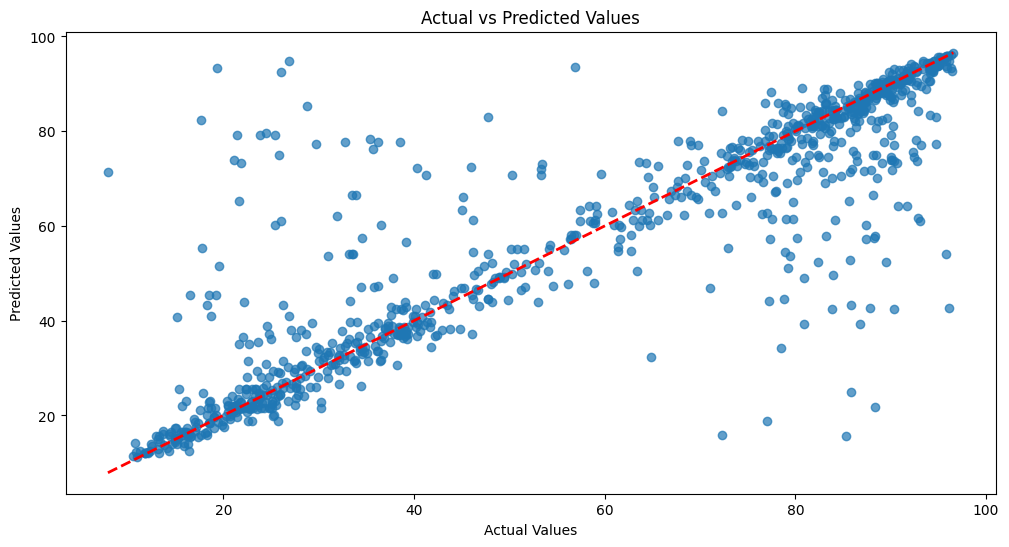

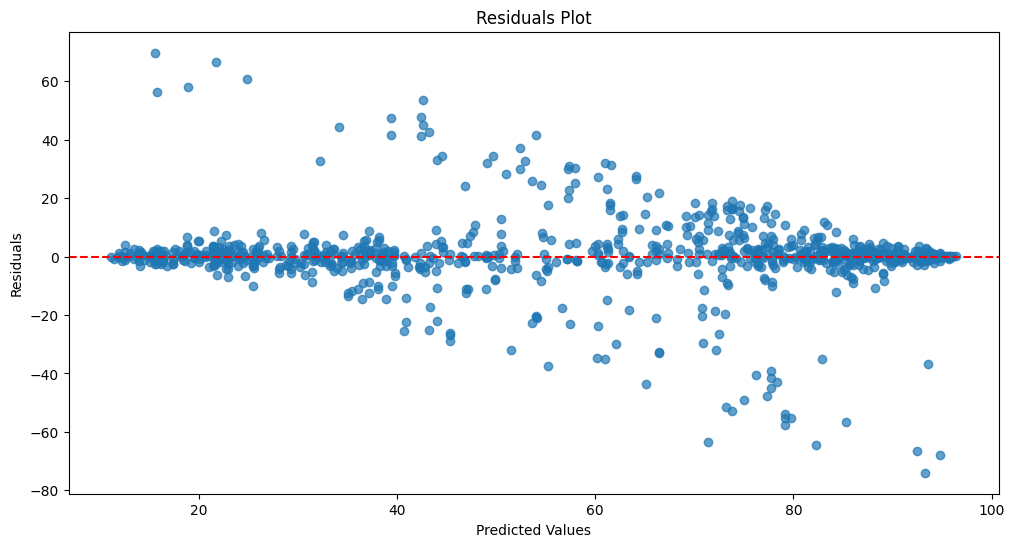

In [ ]:
# 决策树
X = data[['Cycle', 'Theta', 'R1', 'L1', 'LL1', 'P1', 'H1']].values
y = data['Mixing Efficiency'].values

# 划分训练集、验证集和测试集
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.20, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

# 定义参数网格
param_grid = {
    'max_depth': [5, 10, 15, 20, 25],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 创建决策树回归器
dt = DecisionTreeRegressor(random_state=42)

# 使用网格搜索进行超参数调优
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# 获取最佳模型
best_model = grid_search.best_estimator_

# 在测试集上评估模型
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best parameters: {grid_search.best_params_}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")
print(f"RMSE: {rmse}")

# 绘制实际值与预测值的散点图
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

# 绘制残差图
residuals = y_test - y_pred
plt.figure(figsize=(12, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

# 获取当前日期并格式化
current_datetime = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

# 假设 file_path 已定义
directory = os.path.dirname(file_path)

# 保存模型
import joblib
model_file = os.path.join(directory, f"trained_dt_model_{current_datetime}.joblib")
joblib.dump(best_model, model_file)

# 创建评估结果 DataFrame
results = pd.DataFrame({
    'Metric': ['MAE', 'R-squared', 'RMSE'],
    'Value': [mae, r2, rmse]
})

# 构建评估结果文件的完整路径
results_file = os.path.join(directory, 'dt_model_evaluation_results.xlsx')
# 将评估结果保存到 Excel 表格
results.to_excel(results_file, index=False)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Cross-validated RMSE scores: [12.63816816 11.66837981 11.89300039 11.78704244 12.4144728 ]
Average cross-validated RMSE: 12.0802127212105
Best parameters: {'vr__rf__n_estimators': 400, 'vr__rf__min_samples_split': 5, 'vr__rf__min_samples_leaf': 1, 'vr__rf__max_depth': 15, 'vr__gbr__n_estimators': 200, 'vr__gbr__max_depth': 5, 'vr__gbr__learning_rate': 0.1}
MAE: 7.188843038731594
R-squared: 0.7906681381155601
RMSE: 13.027788157415271
MAPE: 0.18197959447201253


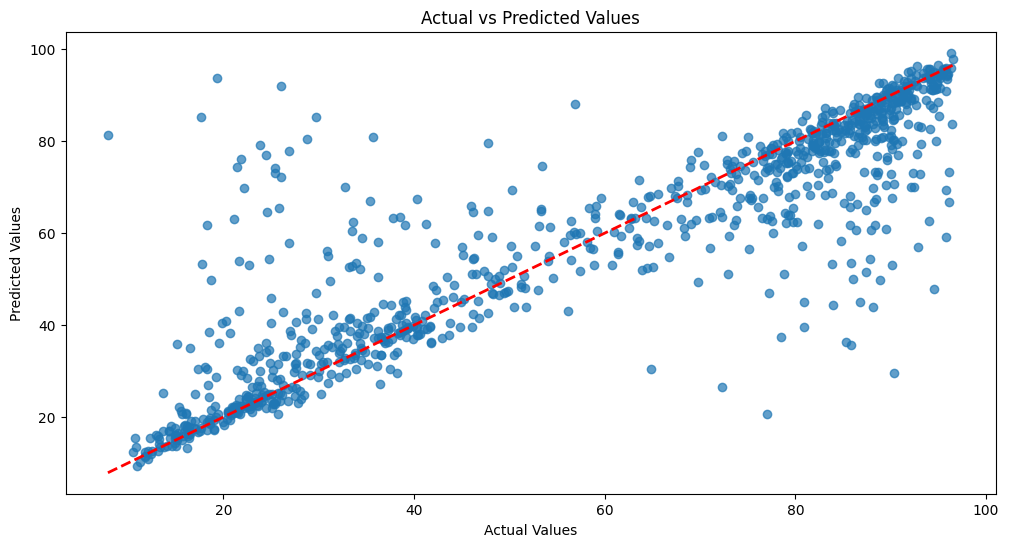

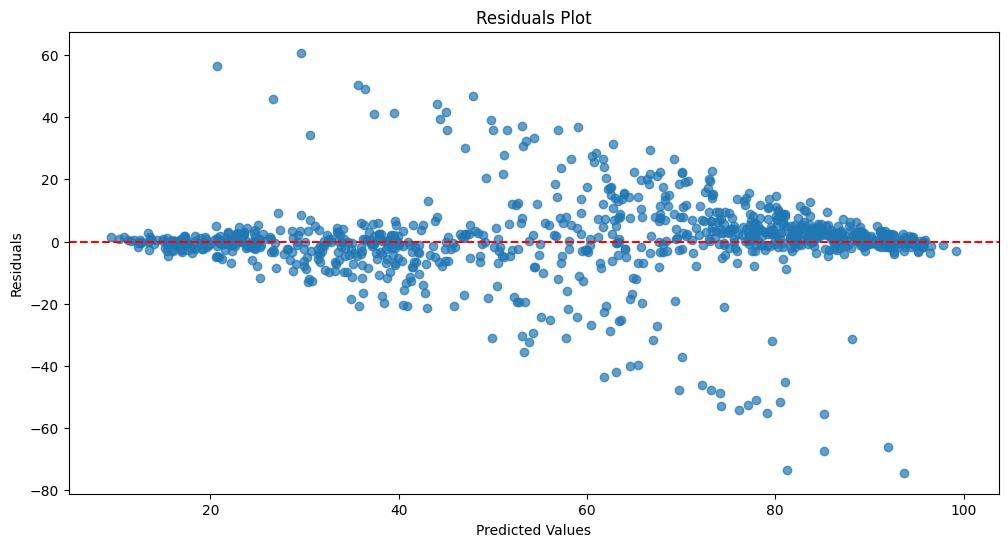

In [7]:
#决策树集成随机森林，ensemblemodel训练_0710
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import datetime
import os
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# 特征标准化
scaler = StandardScaler()

# 划分训练集、验证集和测试集
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.20, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

# 定义参数网格
param_grid = {
    'vr__rf__n_estimators': [200, 300, 400, 500],
    'vr__rf__max_depth': [10, 15, 20, 25, 30, 35],
    'vr__rf__min_samples_split': [2, 5, 10, 15],
    'vr__rf__min_samples_leaf': [1, 2, 4, 6],
    'vr__gbr__n_estimators': [100, 200, 300],
    'vr__gbr__learning_rate': [0.01, 0.05, 0.1],
    'vr__gbr__max_depth': [3, 4, 5]
}

# 创建随机森林回归器
rf = RandomForestRegressor(random_state=42)

# 创建梯度提升回归器
gbr = GradientBoostingRegressor(random_state=42)

# 创建投票回归器
voting_regressor = VotingRegressor(estimators=[('rf', rf), ('gbr', gbr)])

# 创建管道
pipeline = Pipeline([
    ('scaler', scaler),
    ('vr', voting_regressor)
])

# 使用随机搜索进行超参数调优
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=param_grid,
                                   n_iter=100, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train, y_train)

# 获取最佳模型
best_model = random_search.best_estimator_

# 使用交叉验证评估模型
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)
print(f"Cross-validated RMSE scores: {cv_rmse_scores}")
print(f"Average cross-validated RMSE: {cv_rmse_scores.mean()}")

# 在测试集上评估模型
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"Best parameters: {random_search.best_params_}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")

# 绘制实际值与预测值的散点图
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

# 绘制残差图
residuals = y_test - y_pred
plt.figure(figsize=(12, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

# 获取当前日期并格式化
current_datetime = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

# 假设 file_path 已定义
directory = os.path.dirname(file_path)

# 保存模型
model_file = os.path.join(directory, f"trained_vr_model_{current_datetime}.joblib")
joblib.dump(best_model, model_file)

# 创建评估结果 DataFrame
results = pd.DataFrame({
    'Metric': ['MAE', 'R-squared', 'RMSE', 'MAPE'],
    'Value': [mae, r2, rmse, mape]
})

# 构建评估结果文件的完整路径
results_file = os.path.join(directory, 'vr_model_evaluation_results.xlsx')
# 将评估结果保存到 Excel 表格
results.to_excel(results_file, index=False)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
import datetime
import os

Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best parameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2}
MAE: 6.326812800028485
R-squared: 0.7908791036246278
RMSE: 13.02122177341912


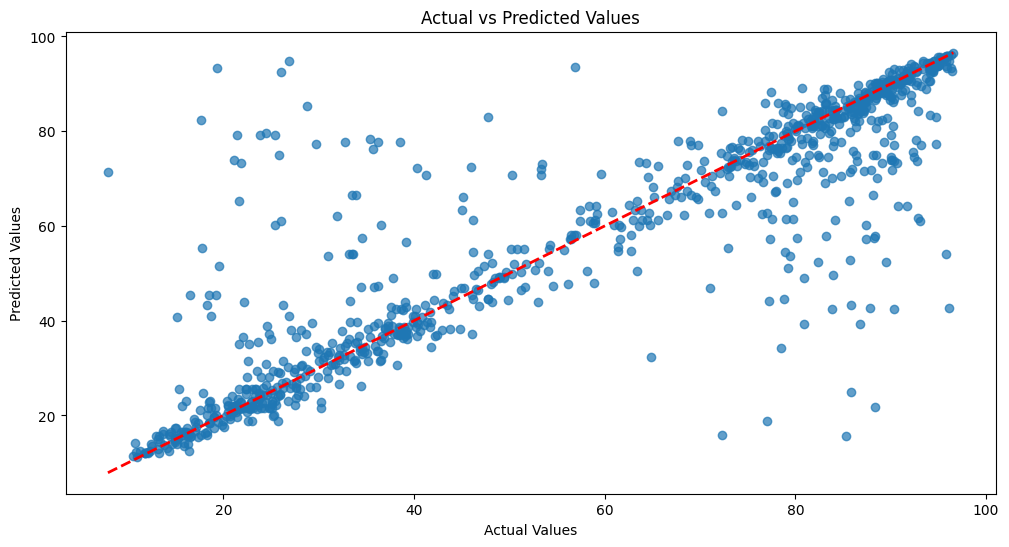

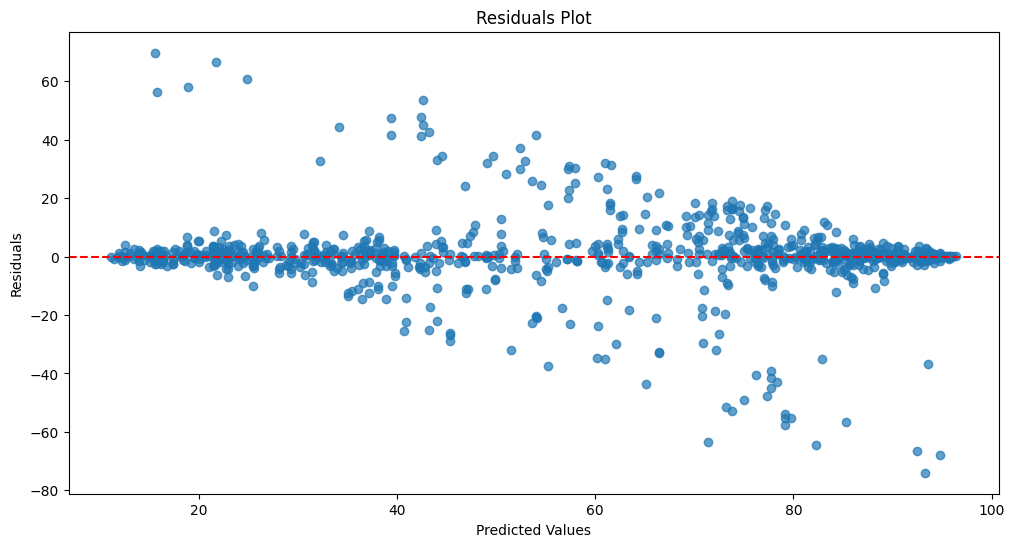

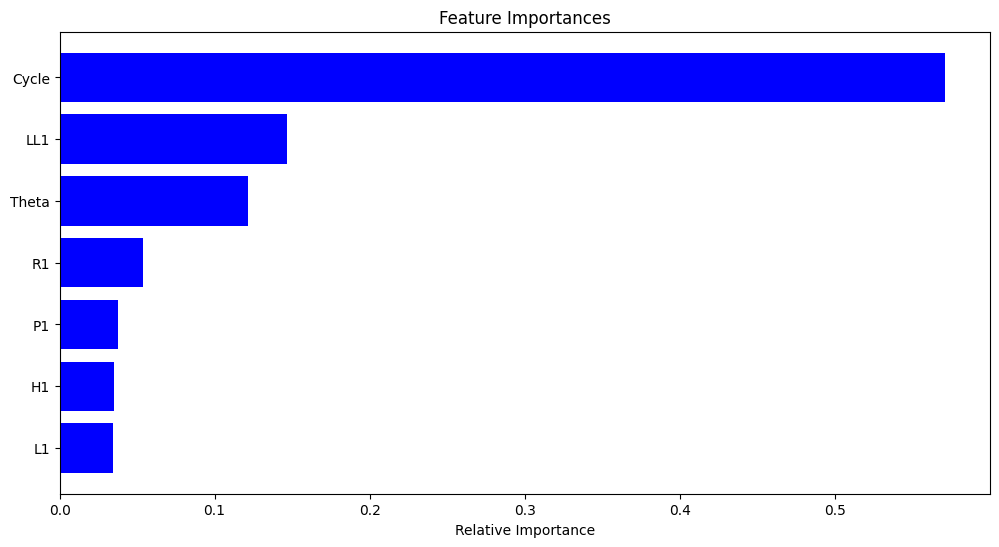

In [ ]:
# 提取特征和目标变量
X = data[['Cycle', 'Theta', 'R1', 'L1', 'LL1', 'P1', 'H1']].values
y = data['Mixing Efficiency'].values

# 划分训练集、验证集和测试集
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.20, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

# 定义参数网格
param_grid = {
    'max_depth': [5, 10, 15, 20, 25],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 创建决策树回归器
dt = DecisionTreeRegressor(random_state=42)

# 使用网格搜索进行超参数调优
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# 获取最佳模型
best_model = grid_search.best_estimator_

# 在测试集上评估模型
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best parameters: {grid_search.best_params_}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")
print(f"RMSE: {rmse}")

# 绘制实际值与预测值的散点图
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

# 绘制残差图
residuals = y_test - y_pred
plt.figure(figsize=(12, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

# 特征重要性
importances = best_model.feature_importances_
features = ['Cycle', 'Theta', 'R1', 'L1', 'LL1', 'P1', 'H1']
indices = np.argsort(importances)

# 绘制特征重要性条形图
plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# 获取当前日期并格式化
current_datetime = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

# 假设 file_path 已定义
directory = os.path.dirname(file_path)

# 保存模型
model_file = os.path.join(directory, f"trained_dt_model_{current_datetime}.joblib")
joblib.dump(best_model, model_file)

# 创建评估结果 DataFrame
results = pd.DataFrame({
    'Metric': ['MAE', 'R-squared', 'RMSE'],
    'Value': [mae, r2, rmse]
})

# 构建评估结果文件的完整路径
results_file = os.path.join(directory, 'dt_model_evaluation_results.xlsx')
# 将评估结果保存到 Excel 表格
results.to_excel(results_file, index=False)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
2880 fits failed out of a total of 4320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
674 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _v

Best parameters: {'criterion': 'friedman_mse', 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 6, 'min_samples_split': 15}
MAE: 6.632930176477346
R-squared: 0.7974046849187395
RMSE: 12.816449156089856


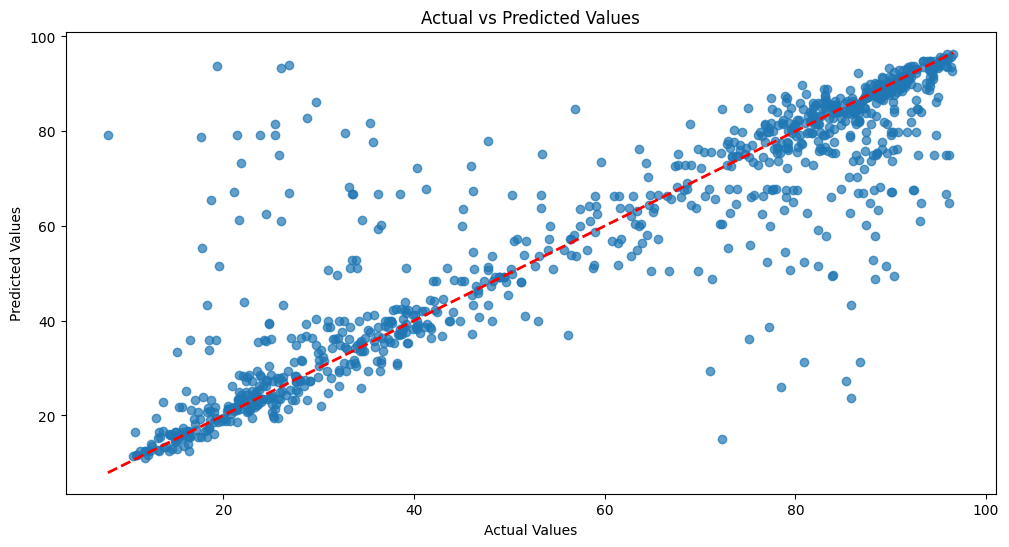

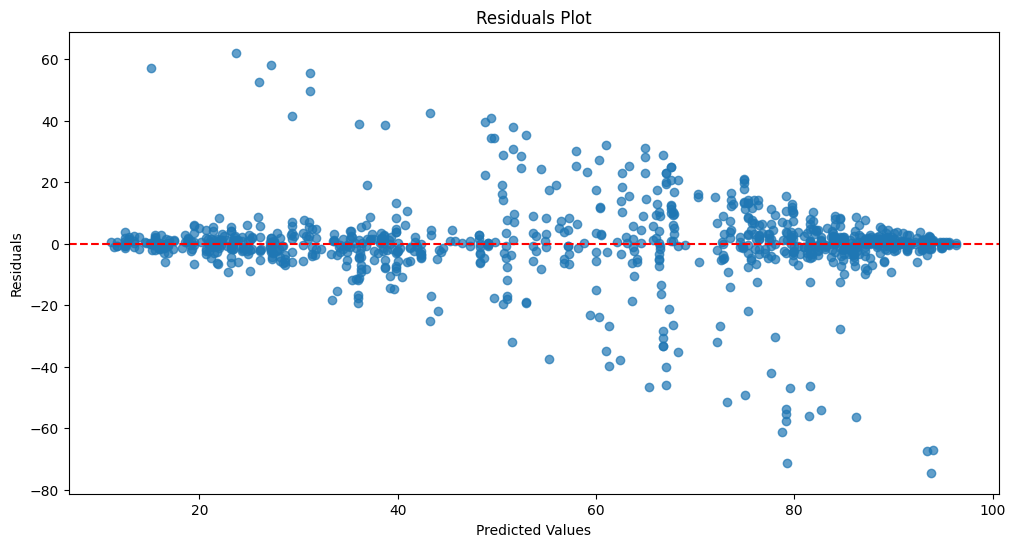

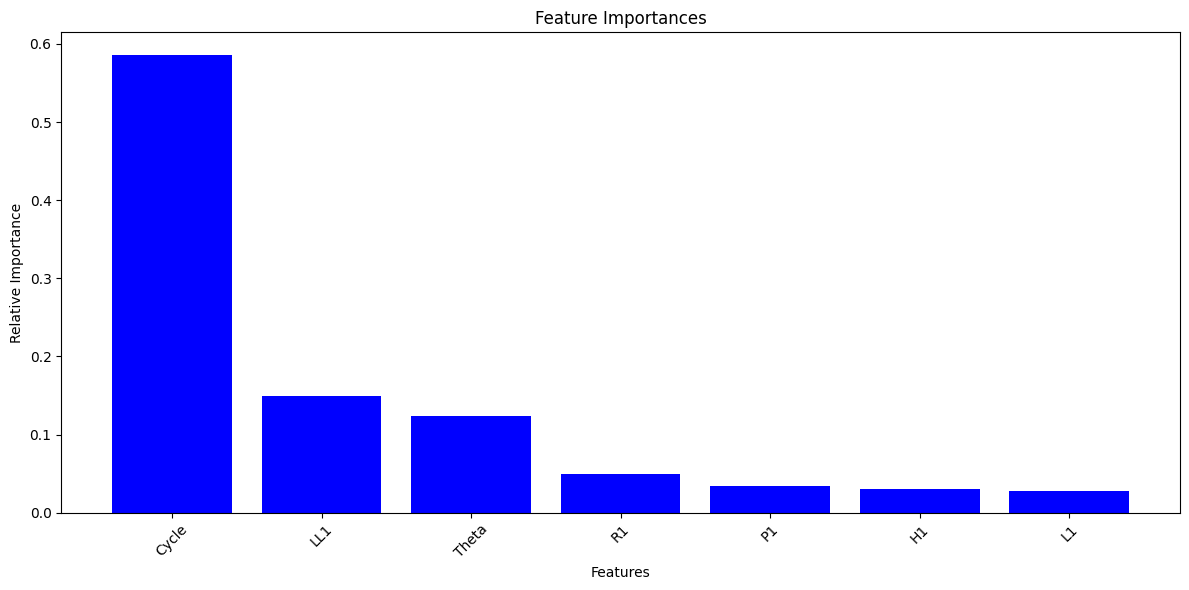

Fitting 5 folds for each of 81 candidates, totalling 405 fits


KeyboardInterrupt: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import joblib
import datetime
import os

# 假设 data 已经加载，且 file_path 已定义

# 提取特征和目标变量
X = data[['Cycle', 'Theta', 'R1', 'L1', 'LL1', 'P1', 'H1']].values
y = data['Mixing Efficiency'].values

# 特征标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集、验证集和测试集
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.20, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

# 定义参数网格（扩展参数范围）
param_grid = {
    'max_depth': [5, 10, 15, 20, 25, 30],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['mse', 'friedman_mse', 'mae']
}

# 创建决策树回归器
dt = DecisionTreeRegressor(random_state=42)

# 使用网格搜索进行超参数调优
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# 获取最佳模型
best_model = grid_search.best_estimator_

# 在测试集上评估模型
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best parameters: {grid_search.best_params_}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")
print(f"RMSE: {rmse}")

# 绘制实际值与预测值的散点图
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

# 绘制残差图
residuals = y_test - y_pred
plt.figure(figsize=(12, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

# 特征重要性
importances = best_model.feature_importances_
features = ['Cycle', 'Theta', 'R1', 'L1', 'LL1', 'P1', 'H1']
indices = np.argsort(importances)[::-1]  # 降序排列

# 绘制特征重要性条形图
plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(len(indices)), importances[indices], color='b', align='center')
plt.xticks(range(len(indices)), [features[i] for i in indices], rotation=45)
plt.xlabel('Features')
plt.ylabel('Relative Importance')
plt.tight_layout()
plt.show()

# 获取当前日期并格式化
current_datetime = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

# 假设 file_path 已定义
directory = os.path.dirname(file_path)

# 保存模型
model_file = os.path.join(directory, f"trained_dt_model_{current_datetime}.joblib")
joblib.dump(best_model, model_file)

# 创建评估结果 DataFrame
results = pd.DataFrame({
    'Metric': ['MAE', 'R-squared', 'RMSE'],
    'Value': [mae, r2, rmse]
})

# 构建评估结果文件的完整路径
results_file = os.path.join(directory, 'dt_model_evaluation_results.xlsx')

# 将评估结果保存到 Excel 表格
results.to_excel(results_file, index=False)

# 尝试使用随机森林模型
rf = RandomForestRegressor(random_state=42)
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid,
                              cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
rf_grid_search.fit(X_train, y_train)

best_rf_model = rf_grid_search.best_estimator_
rf_y_pred = best_rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

print("\nRandom Forest Results:")
print(f"Best parameters: {rf_grid_search.best_params_}")
print(f"MAE: {rf_mae}")
print(f"R-squared: {rf_r2}")
print(f"RMSE: {rf_rmse}")

# 保存随机森林模型
rf_model_file = os.path.join(directory, f"trained_rf_model_{current_datetime}.joblib")
joblib.dump(best_rf_model, rf_model_file)

# 更新评估结果 DataFrame
results = pd.DataFrame({
    'Metric': ['MAE', 'R-squared', 'RMSE'],
    'Decision Tree': [mae, r2, rmse],
    'Random Forest': [rf_mae, rf_r2, rf_rmse]
})

# 将更新后的评估结果保存到 Excel 表格
results.to_excel(results_file, index=False)

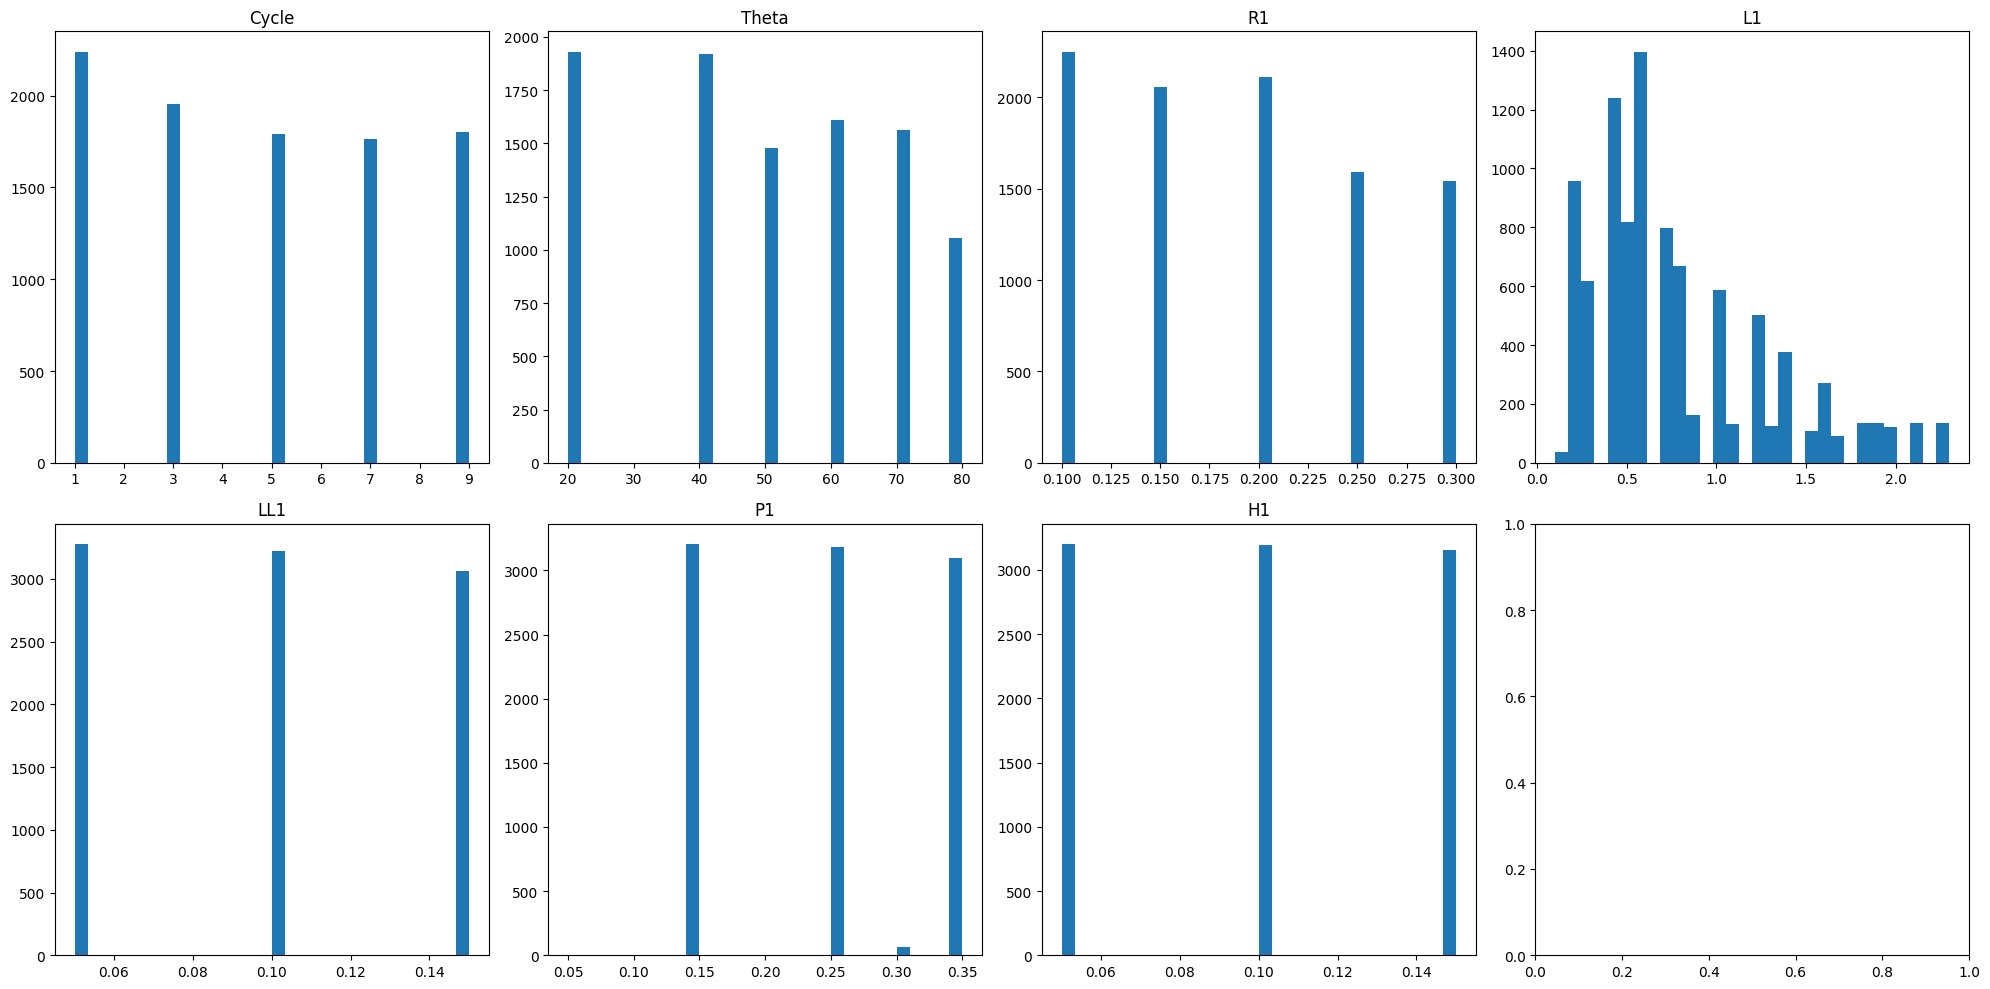

Decision Tree R2 Score: 0.6599161108773317
Random Forest R2 Score: 0.8098996522926383
Number of extrapolation points: 1


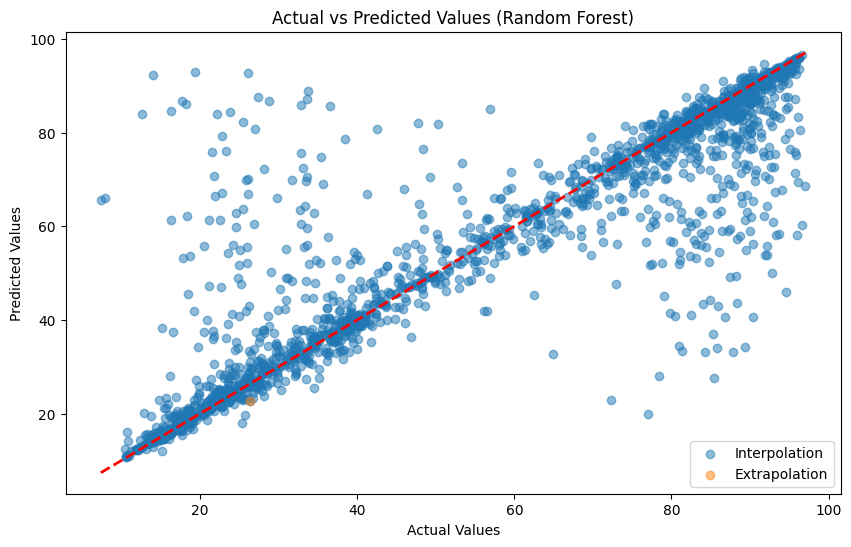

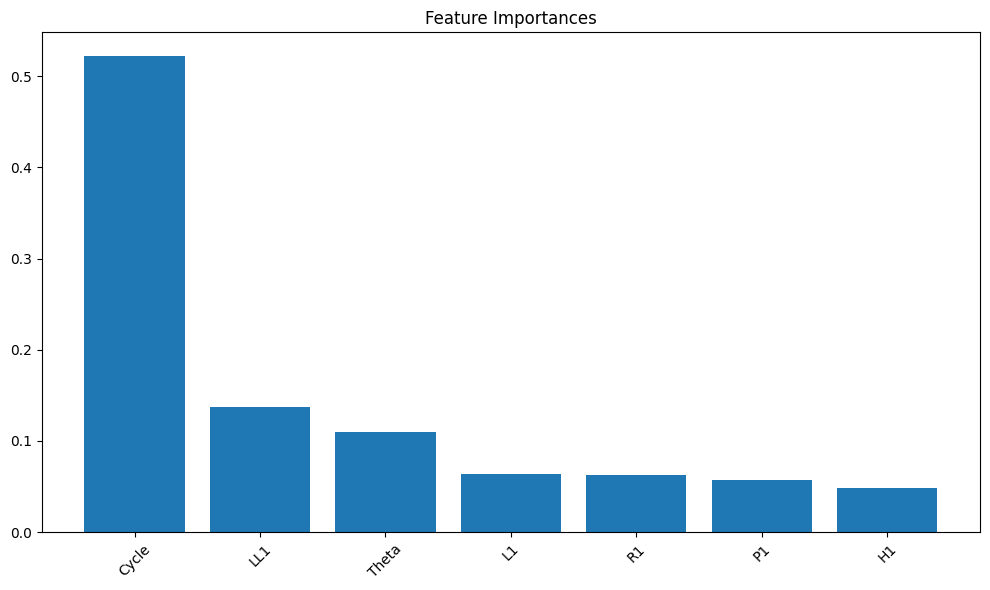

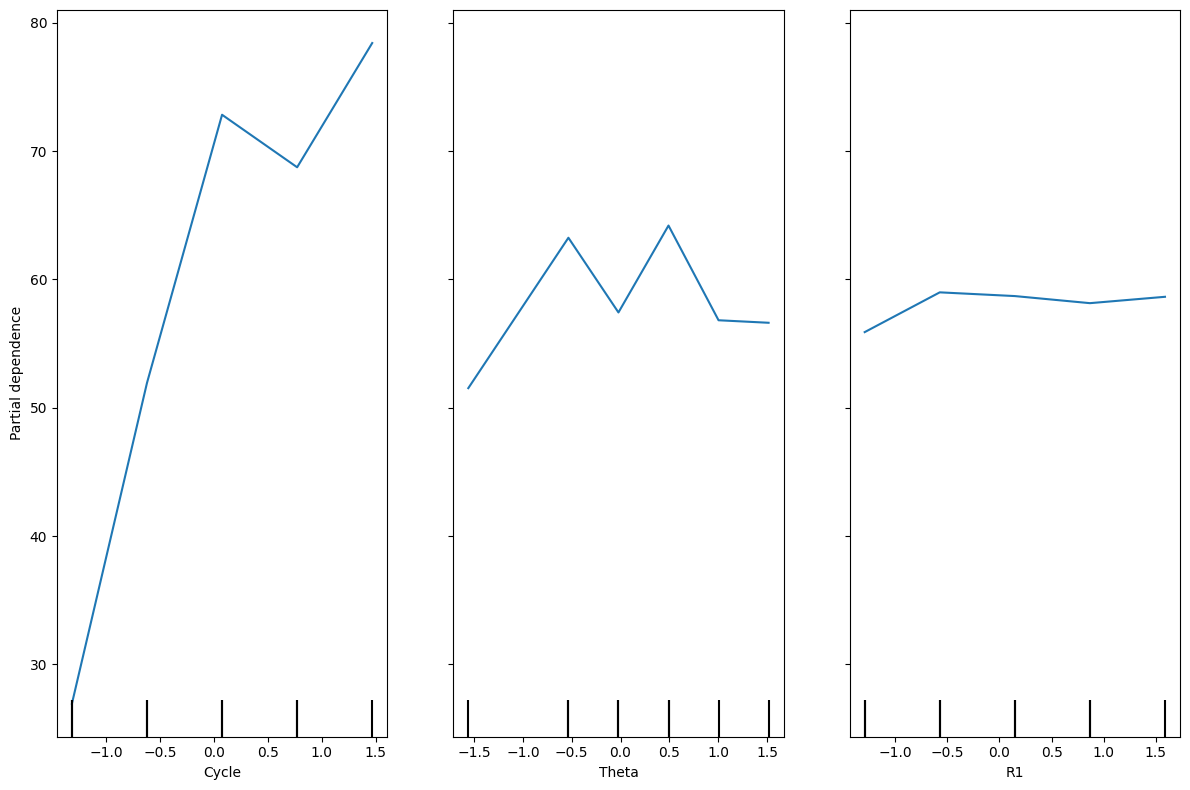

Results saved to /content/drive/MyDrive/reTesla chip/model_results_2024-07-09_10-20-44.xlsx
Best model saved to /content/drive/MyDrive/reTesla chip/trained_model_2024-07-09_10-20-44.joblib
Scaler saved to /content/drive/MyDrive/reTesla chip/scaler_2024-07-09_10-20-44.joblib


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay
import os
import datetime
import joblib

# 1. Check data distribution
def plot_feature_distributions(X, feature_names):
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    axes = axes.ravel()
    for i, feature in enumerate(feature_names):
        axes[i].hist(X[:, i], bins=30)
        axes[i].set_title(feature)
    plt.tight_layout()
    plt.show()

# 2. Implement a simple extrapolation detection function
def is_extrapolation(X_train, X_test, feature_names):
    extrapolation = []
    for i in range(X_train.shape[1]):
        min_train, max_train = X_train[:, i].min(), X_train[:, i].max()
        extrapolation.append(np.logical_or(X_test[:, i] < min_train, X_test[:, i] > max_train))
    return np.any(extrapolation, axis=0)

# 3. Modify model training and evaluation process
X = data[['Cycle', 'Theta', 'R1', 'L1', 'LL1', 'P1', 'H1']].values
y = data['Mixing Efficiency'].values
feature_names = ['Cycle', 'Theta', 'R1', 'L1', 'LL1', 'P1', 'H1']

# Plot feature distributions
plot_feature_distributions(X, feature_names)

# Data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Train Random Forest model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train_scaled, y_train)

# Evaluate models
y_pred_dt = dt_model.predict(X_test_scaled)
y_pred_rf = rf_model.predict(X_test_scaled)

dt_r2 = r2_score(y_test, y_pred_dt)
rf_r2 = r2_score(y_test, y_pred_rf)

print("Decision Tree R2 Score:", dt_r2)
print("Random Forest R2 Score:", rf_r2)

# Check for extrapolation
extrapolation_mask = is_extrapolation(X_train_scaled, X_test_scaled, feature_names)
print("Number of extrapolation points:", np.sum(extrapolation_mask))

# Visualize prediction results
plt.figure(figsize=(10, 6))
plt.scatter(y_test[~extrapolation_mask], y_pred_rf[~extrapolation_mask], alpha=0.5, label='Interpolation')
plt.scatter(y_test[extrapolation_mask], y_pred_rf[extrapolation_mask], alpha=0.5, label='Extrapolation')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Random Forest)')
plt.legend()
plt.show()

# 4. Feature importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()

# 5. Partial Dependence Plot (for Random Forest model)
fig, ax = plt.subplots(figsize=(12, 8))
display = PartialDependenceDisplay.from_estimator(rf_model, X_train_scaled, features=[0, 1, 2], feature_names=feature_names, ax=ax)
plt.tight_layout()
plt.show()

# 6. Save results to Excel
current_datetime = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
file_path = '/content/drive/MyDrive/reTesla chip/total_v0708.xlsx'  # 假设这是您的原始数据文件路径
directory = os.path.dirname(file_path)

results = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest'],
    'R2 Score': [dt_r2, rf_r2],
    'Extrapolation Points': [np.sum(extrapolation_mask), np.sum(extrapolation_mask)]
})

results_file = os.path.join(directory, f"model_results_{current_datetime}.xlsx")
results.to_excel(results_file, index=False)
print(f"Results saved to {results_file}")

# 7. Save the best model (assuming Random Forest is better)
best_model = rf_model if rf_r2 > dt_r2 else dt_model
model_file = os.path.join(directory, f"trained_model_{current_datetime}.joblib")
joblib.dump(best_model, model_file)
print(f"Best model saved to {model_file}")

# 8. Save the scaler
scaler_file = os.path.join(directory, f"scaler_{current_datetime}.joblib")
joblib.dump(scaler, scaler_file)
print(f"Scaler saved to {scaler_file}")


In [ ]:
!pip install --upgrade scikit-learn
!pip install --upgrade numpy pandas scikit-learn matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 55.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 22.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas

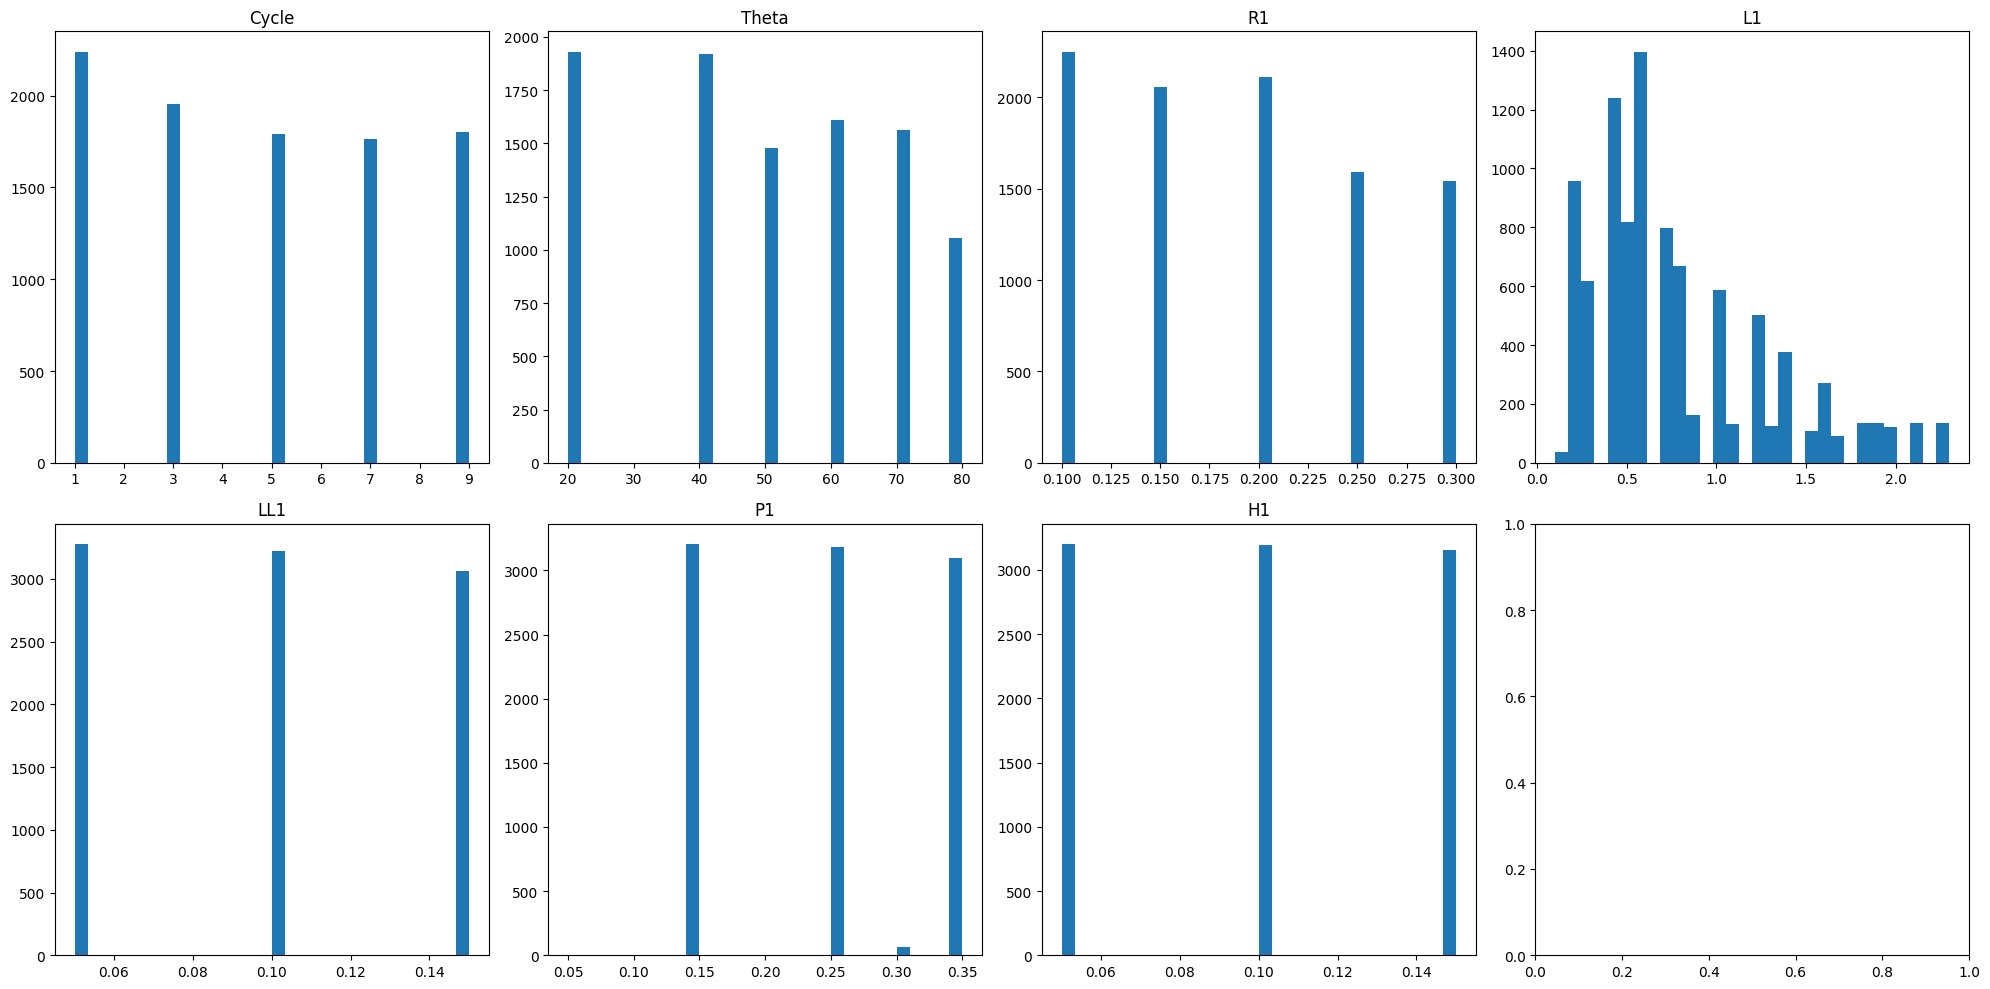

Decision Tree R2 Score: 0.6599161108773317
Random Forest R2 Score: 0.8098996522926383
Number of extrapolation points: 1


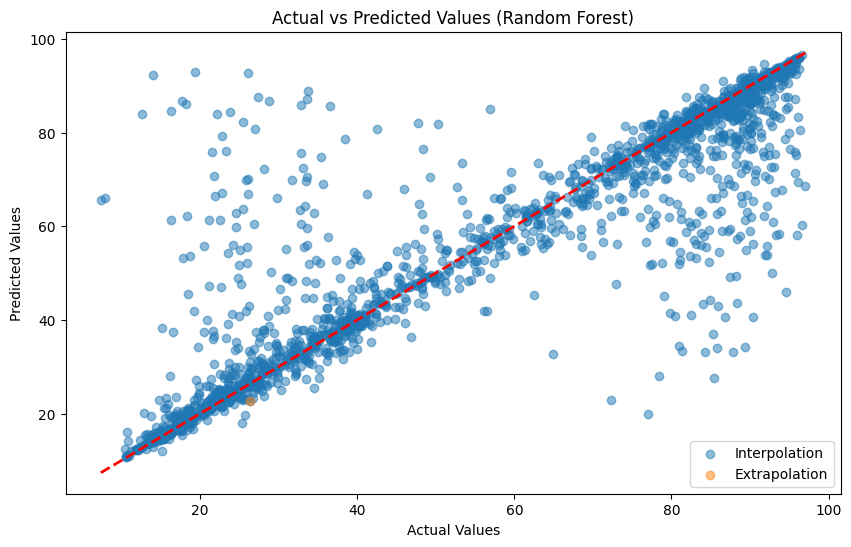

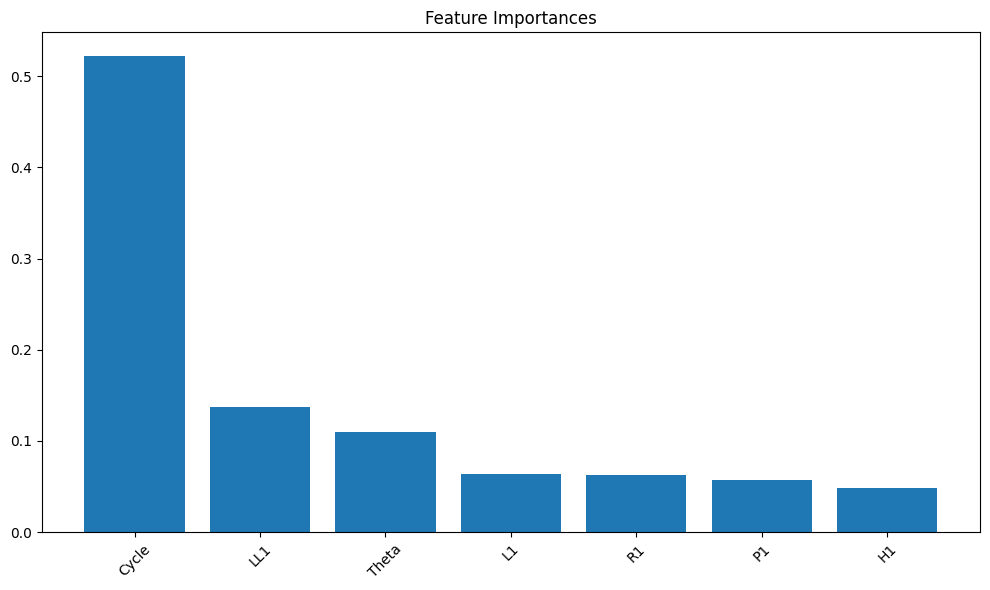

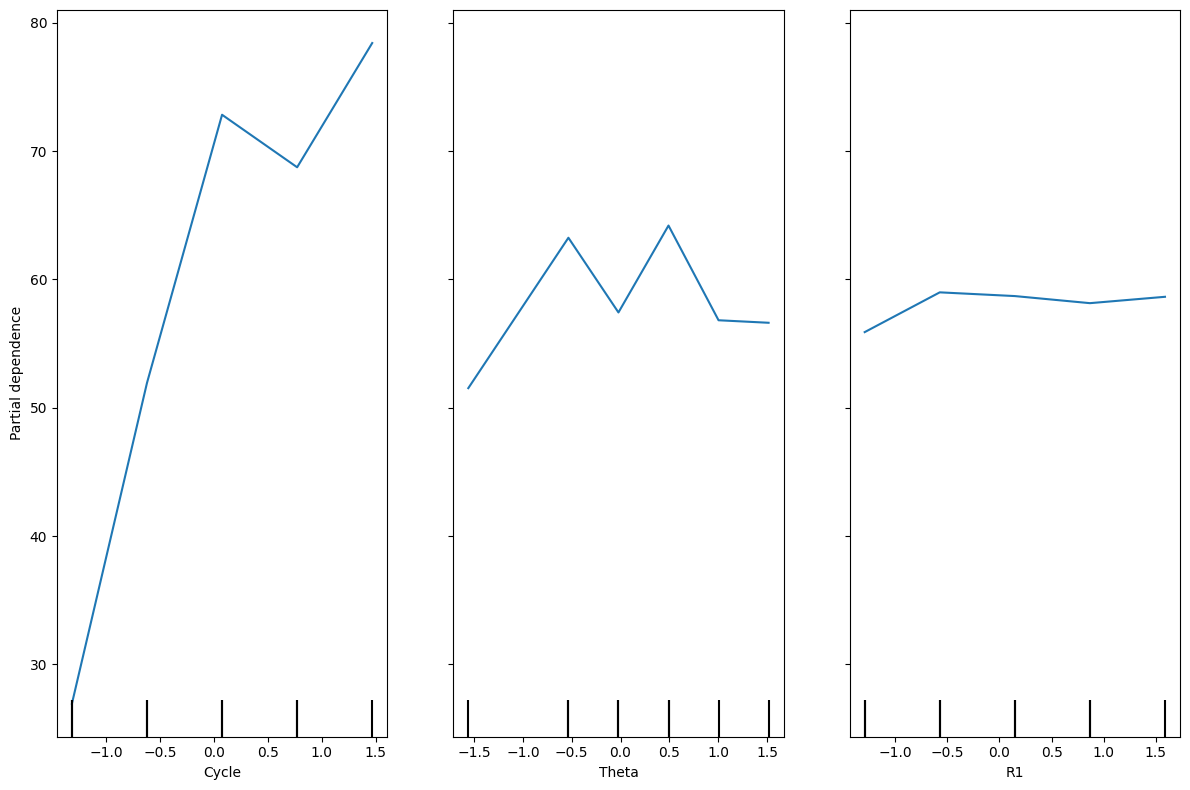

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay
# 假设 data 已经加载

# 1. Check data distribution
def plot_feature_distributions(X, feature_names):
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    axes = axes.ravel()
    for i, feature in enumerate(feature_names):
        axes[i].hist(X[:, i], bins=30)
        axes[i].set_title(feature)
    plt.tight_layout()
    plt.show()

# 2. Implement a simple extrapolation detection function
def is_extrapolation(X_train, X_test, feature_names):
    extrapolation = []
    for i in range(X_train.shape[1]):
        min_train, max_train = X_train[:, i].min(), X_train[:, i].max()
        extrapolation.append(np.logical_or(X_test[:, i] < min_train, X_test[:, i] > max_train))
    return np.any(extrapolation, axis=0)

# 3. Modify model training and evaluation process
X = data[['Cycle', 'Theta', 'R1', 'L1', 'LL1', 'P1', 'H1']].values
y = data['Mixing Efficiency'].values
feature_names = ['Cycle', 'Theta', 'R1', 'L1', 'LL1', 'P1', 'H1']

# Plot feature distributions
plot_feature_distributions(X, feature_names)

# Data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Train Random Forest model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train_scaled, y_train)

# Evaluate models
y_pred_dt = dt_model.predict(X_test_scaled)
y_pred_rf = rf_model.predict(X_test_scaled)

print("Decision Tree R2 Score:", r2_score(y_test, y_pred_dt))
print("Random Forest R2 Score:", r2_score(y_test, y_pred_rf))

# Check for extrapolation
extrapolation_mask = is_extrapolation(X_train_scaled, X_test_scaled, feature_names)
print("Number of extrapolation points:", np.sum(extrapolation_mask))

# Visualize prediction results
plt.figure(figsize=(10, 6))
plt.scatter(y_test[~extrapolation_mask], y_pred_rf[~extrapolation_mask], alpha=0.5, label='Interpolation')
plt.scatter(y_test[extrapolation_mask], y_pred_rf[extrapolation_mask], alpha=0.5, label='Extrapolation')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Random Forest)')
plt.legend()
plt.show()

# 4. Feature importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()

# 5. Partial Dependence Plot (for Random Forest model)
fig, ax = plt.subplots(figsize=(12, 8))
display = PartialDependenceDisplay.from_estimator(rf_model, X_train_scaled, features=[0, 1, 2], feature_names=feature_names, ax=ax)
plt.tight_layout()
plt.show()